<a href="https://colab.research.google.com/github/AbdalrahmanAliElnashar/CNN-Projects/blob/main/03-CIFAR10_Classification/CIFAR10_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:#ff6666' role="tab" aria-controls="home"><center>CIFAR-10 - Object Recognition in Images using CNN</center></h1>

# Using Kaggle On Colab

## 1.1 Upload Kaggle.json to connect Colab to kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdalrahmanelnashar","key":"f2bec9720ff7fca08e17f5c9f67dc36f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## 1.2 Download dataset form Kaggle

In [ ]:
! kaggle datasets download -d oxcdcd/cifar10

 92% 161M/175M [00:01<00:00, 141MB/s]
100% 175M/175M [00:01<00:00, 129MB/s]


## 1.3 Unzip Files

In [ ]:
! unzip /content/cifar10.zip


In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob
import cv2 
import tensorflow as tf
import keras

# Dataset Directory

In [ ]:
trainDir = '/content/cifar10/train'
testDir = '/content/cifar10/test'

In [ ]:
print(os.listdir(trainDir)) # print folders of train dataset
print(os.listdir(testDir))  # print folders of test dataset

['frog', 'automobile', 'truck', 'bird', 'cat', 'ship', 'dog', 'airplane', 'deer', 'horse']
['frog', 'automobile', 'truck', 'bird', 'cat', 'ship', 'dog', 'airplane', 'deer', 'horse']



---




# Open Folders 

## Train Dataset

In [ ]:
for folder in os.listdir(trainDir):
    folder_path = os.path.join(trainDir, folder)
    images = []
    for file in os.listdir(folder_path):
        images.append(file)
    # print(len(images))

    print(f'For training data, found {len(images)} image in folder {folder}')

For training data, found 5000 image in folder frog
For training data, found 5000 image in folder automobile
For training data, found 5000 image in folder truck
For training data, found 5000 image in folder bird
For training data, found 5000 image in folder cat
For training data, found 5000 image in folder ship
For training data, found 5000 image in folder dog
For training data, found 5000 image in folder airplane
For training data, found 5000 image in folder deer
For training data, found 5000 image in folder horse


## Test Dataset

In [ ]:
for folder in os.listdir(testDir):
    folder_path = os.path.join(testDir, folder)
    images = []
    for file in os.listdir(folder_path):
        images.append(file)
    # print(len(images))
    
    print(f'For testing data, found {len(images)} image in folder {folder}')

For testing data, found 1000 image in folder frog
For testing data, found 1000 image in folder automobile
For testing data, found 1000 image in folder truck
For testing data, found 1000 image in folder bird
For testing data, found 1000 image in folder cat
For testing data, found 1000 image in folder ship
For testing data, found 1000 image in folder dog
For testing data, found 1000 image in folder airplane
For testing data, found 1000 image in folder deer
For testing data, found 1000 image in folder horse


--- 



# Check image size

## Train Dataset

In [ ]:
image_size = []
for folder in os.listdir(trainDir):
        folder_path = os.path.join(trainDir, folder)
        for file in os.listdir(folder_path):
            img = plt.imread(os.path.join(folder_path, file))
            image_size.append(img.shape)
pd.Series(image_size).value_counts()   

(32, 32, 3)    50000
dtype: int64

## Test Dataset

In [ ]:
image_size = []
for folder in os.listdir(testDir):
        folder_path = os.path.join(testDir, folder)
        for file in os.listdir(folder_path):
            img = plt.imread(os.path.join(folder_path, file))
            image_size.append(img.shape)
pd.Series(image_size).value_counts()   

(32, 32, 3)    10000
dtype: int64



---




# Reading Images

## Labeling each Folder

In [ ]:
SIZE = 32 

folders = {
        'airplane' : 0,
        'automobile' : 1,
        'bird' : 2,
        'cat' : 3,
        'deer' : 4,
        'dog' : 5,
        'frog' : 6,
        'horse' : 7,
        'ship' : 8,
        'truck' : 9
        }

## Train Dataset

In [ ]:
import cv2

X_train = []
y_train = []

for folder in os.listdir(trainDir):
    folder_path = os.path.join(trainDir, folder)
    # x = 0 
    for file in os.listdir(folder_path):
        # x += 1
        # 1st thing read the images
        image = cv2.imread(os.path.join(folder_path, file)) # path not file 
        # 2nd thing resize the images
        image_array = cv2.resize(image, (SIZE, SIZE))
        # 3rd thing append image_array to X_train and convert to list
        X_train.append(list(image_array))
        # 4th thing append folder label to y_train
        y_train.append(folders[folder])
        # if x == 10:
            # break

In [ ]:
print(f'we have {len(X_train)} items in X_train')
print(f'we have {len(y_train)} items in y_train')

we have 50000 items in X_train
we have 50000 items in y_train


<class 'list'>
4


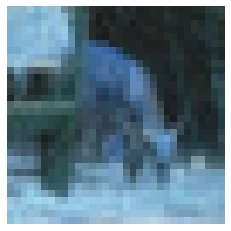

In [ ]:
print(type(X_train)) # type --> list
# print(X_train[0])  
print(y_train[40000])
plt.imshow(X_train[40000])
plt.axis('off')
plt.show()

## Test Dataset

In [ ]:
X_test = []
y_test = []

for folder in os.listdir(testDir):
    folder_path = os.path.join(testDir, folder)
    # x = 0 
    for file in os.listdir(folder_path):
        # x += 1
        # 1st thing read the images
        image = cv2.imread(os.path.join(folder_path, file)) # path not file 
        # 2nd thing resize the images
        image_array = cv2.resize(image, (SIZE, SIZE))
        # 3rd thing append image_array to X_train and convert to list
        X_test.append(list(image_array))
        # 4th thing append folder label to y_train
        y_test.append(folders[folder])
        # if x == 10:
            # break


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

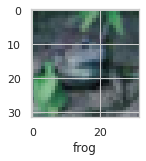

In [ ]:
plot_sample(X_train, y_train , 1000)

In [ ]:
print(f'we have {len(X_test)} items in X_test')
print(f'we have {len(y_test)} items in y_test')

we have 10000 items in X_test
we have 10000 items in y_test


In [ ]:
print(type(X_test)) # type --> list
#print(X_test[0])  
print(y_test[0]) 

<class 'list'>
6




---

# Visualize Some images

In [ ]:
# Fucntion to return folder name from Dictionary
def get_folder_name(x):
    # function to return class name
    for key, value in folders.items():
        if x == value:
            return key

## Train Dataset

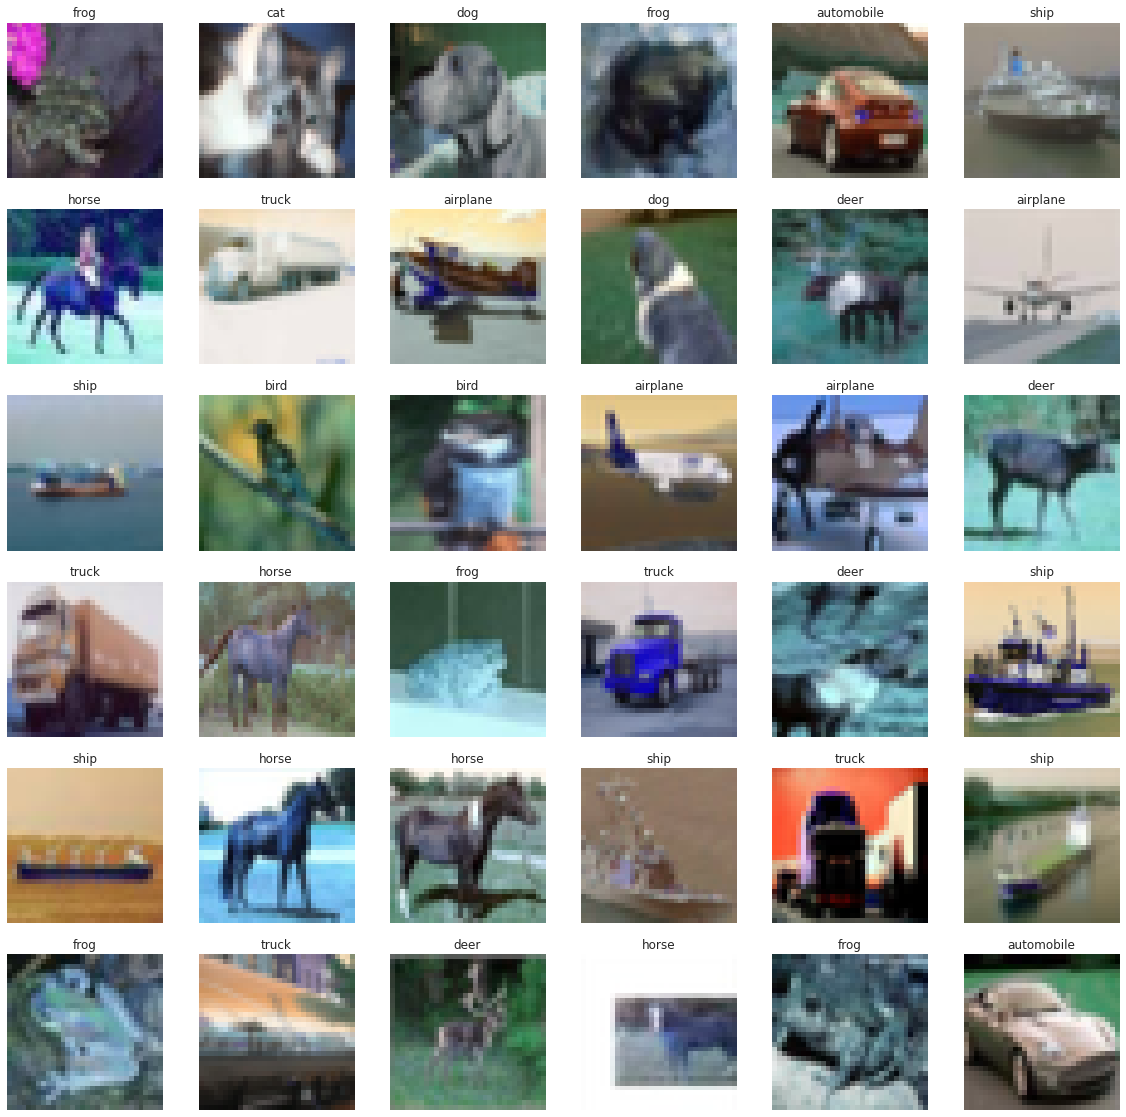

In [ ]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(get_folder_name(y_train[i]))

# you want to check this code again 

## Test Dataset

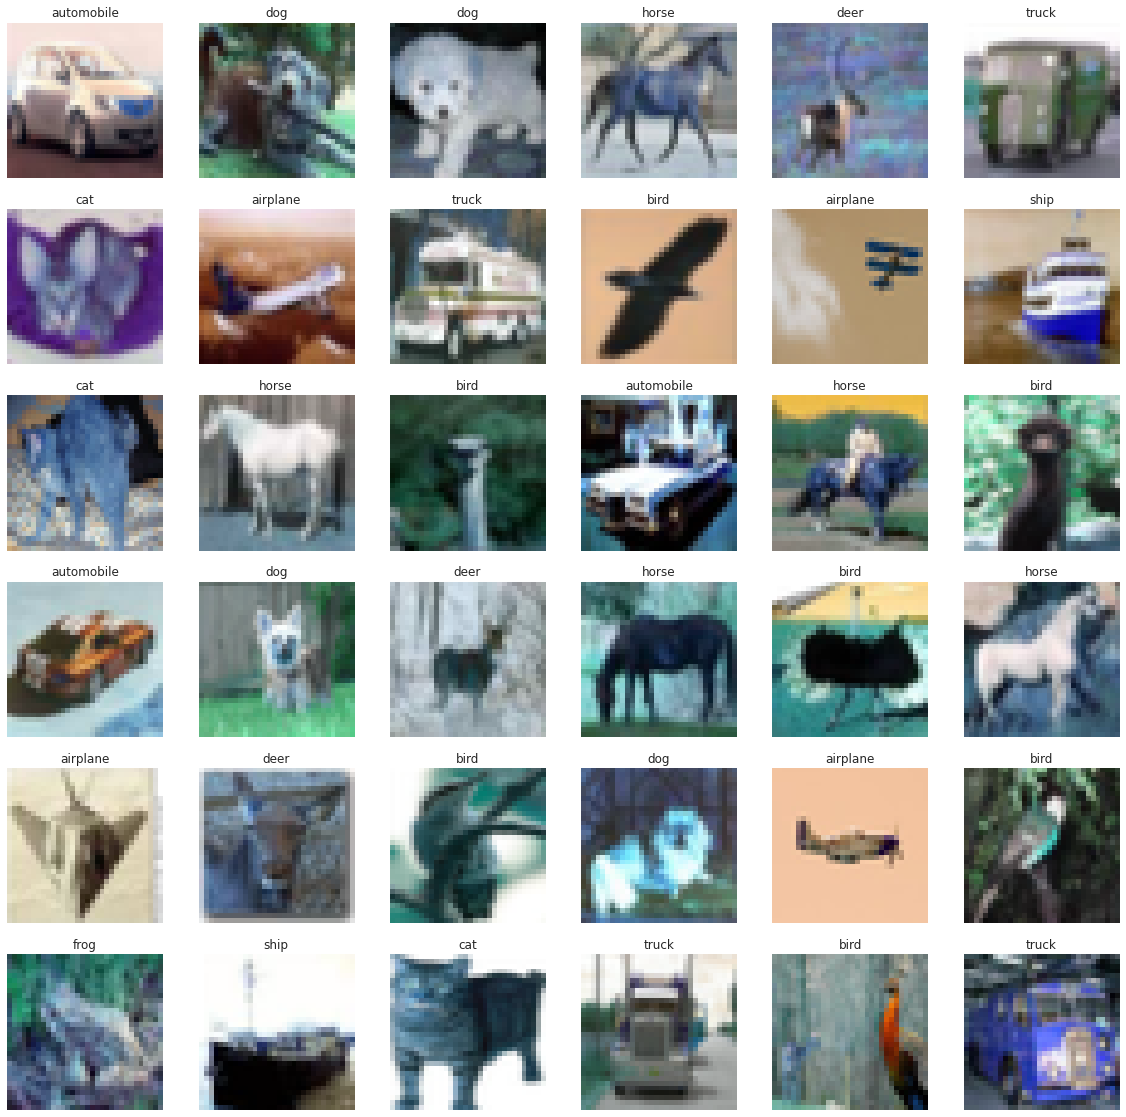

In [ ]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(get_folder_name(y_test[i]))



---


# Lets Try to load saved model and check evaluation !!

In [ ]:
# Convert dataset to numpy array
X_train = np.array(X_train) 
y_train = np.array(y_train) 
X_test = np.array(X_test) 
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')


# Normalization
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0


X_train shape  is (50000, 32, 32, 3)
X_test shape  is (10000, 32, 32, 3)
y_train shape  is (50000,)
y_test shape  is (10000,)


## 1- Load Model

In [ ]:
from keras.models import load_model

model = load_model('/content/First_model.h5')


In [ ]:
# %%time

# model.fit(X_train, y_train, epochs = 30, verbose= 1, batch_size = 32)

## 2- Evaluate Model

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('The loss function of this model is :', loss)
print('The Accuracy of this model is :', acc)

ValueError: ignored

## 3- Predict

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(get_folder_name(np.argmax(y_pred[i])))

# Build a CNN Network

## Convert images list to array

In [ ]:
X_train = np.array(X_train) 
y_train = np.array(y_train) 
X_test = np.array(X_test) 
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0


X_train shape  is (50000, 32, 32, 3)
X_test shape  is (10000, 32, 32, 3)
y_train shape  is (50000,)
y_test shape  is (10000,)


In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [ ]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(SIZE,SIZE,3), padding='same'))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

          
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(265, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))   

In [ ]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                        

In [ ]:
epochs = 20
model = model.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/20
782/782 [==============================] - 17s 10ms/step - loss: 2.3858 - accuracy: 0.2898
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 1.5918 - accuracy: 0.4181
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 1.4340 - accuracy: 0.4845
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 1.3118 - accuracy: 0.5335
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 1.2182 - accuracy: 0.5710
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 1.1473 - accuracy: 0.5944
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0956 - accuracy: 0.6163
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0545 - accuracy: 0.6310
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0130 - accuracy: 0.6460
Epoch 10/20
782/782 [==============================] - 4s 5ms/step - loss: 0.9832 - accuracy: 0.65

In [ ]:
# Training With Normalization
epochs = 20
model = model.fit(X_train_norm, y_train, epochs=epochs,batch_size=64,verbose=1)

KeyboardInterrupt: ignored

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test_norm, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

313/313 [==============================] - 2s 4ms/step - loss: 0.6703 - accuracy: 0.7661
Test Loss is 0.6702634692192078
Test Accuracy is 0.7660999894142151


In [ ]:
y_pred = model.predict(X_test_norm)

print('Prediction Shape is {}'.format(y_pred.shape))

313/313 [==============================] - 1s 2ms/step
Prediction Shape is (10000, 10)


In [ ]:
y_result = model.predict(X_test_norm)

print('Prediction Shape is {}'.format(y_result.shape))

313/313 [==============================] - 1s 2ms/step
Prediction Shape is (10000, 10)


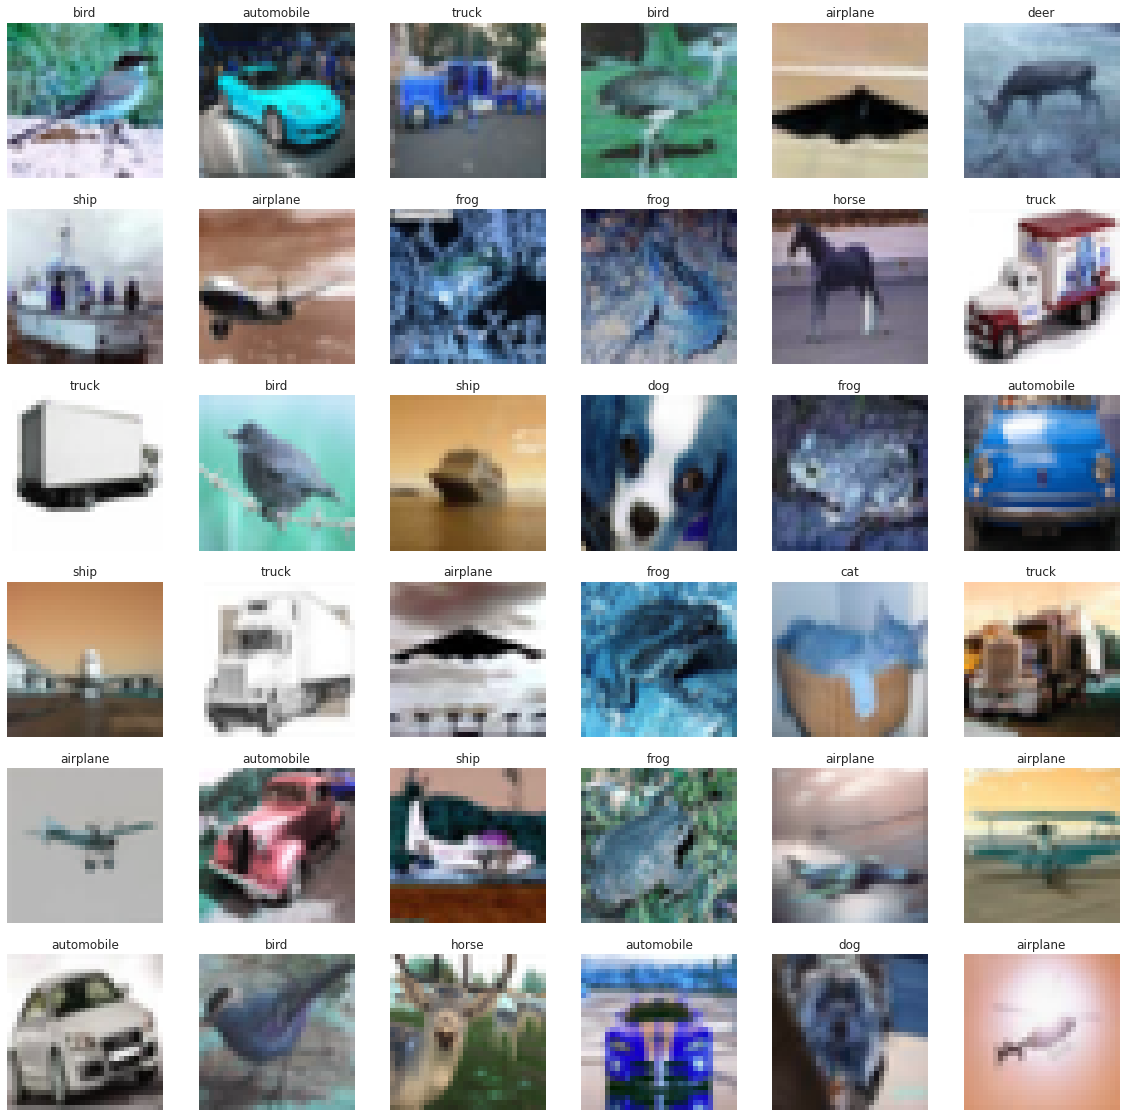

In [ ]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(get_folder_name(np.argmax(y_result[i])))

In [ ]:
from keras.models import  load_model

KerasModel.save(r'/content/Saved Model/CIFAR10_modek.h5')


# Build a ANN Network

In [ ]:
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.cifar10.load_data()

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [ ]:
# Convert dataset to numpy array
X_train = np.array(X_train) 
y_train = np.array(y_train) 
X_test = np.array(X_test) 
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')


# Normalization
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0


In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
# Build your Neural Network
ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'), 
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the Neural Netwokr
ann.compile(optimizer='SGD', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# train the Neural Netwokr
ann.fit(X_train_norm, y_train, epochs=5)

# Build CNN From Kaggle

## Convert images list to array

In [ ]:
X_train = np.array(X_train) 
y_train = np.array(y_train) 
X_test = np.array(X_test) 
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')


In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
layers = [Conv2D(32,(3,3),padding='same',strides=(2,2),input_shape=(32, 32, 3)),
         Activation('relu'),
         Conv2D(32,(3,3)),
         Activation('relu'),
         MaxPooling2D(pool_size=(2,2)),
         Dropout(0.5),
         Conv2D(64, (3,3),padding='same'),
         Activation('relu'),
         Conv2D(64,(3,3)),
         Activation('relu'),
         MaxPooling2D(pool_size=(2,2)),
         Dropout(0.25),
         Flatten(),
         Dense(512),
         Activation('relu'),
         Dropout(0.5),
         Dense(10),
         Activation('softmax')]

model2 = Sequential(layers)
model2.summary()

In [ ]:
opt_2 = tf.keras.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train , epochs = 15, shuffle=True, batch_size = 32)